In [1]:
library(forecast)

In [2]:
dataset = read.csv("../../dengueData/Iquitos/iquitos_training_data.csv")
dataset

season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,total_cases
2000/2001,1,2000-07-01,0,0,0,0,0,0
2000/2001,2,2000-07-08,0,0,0,0,0,0
2000/2001,3,2000-07-15,0,0,0,0,0,0
2000/2001,4,2000-07-22,0,0,0,0,0,0
2000/2001,5,2000-07-29,0,0,0,0,0,0
2000/2001,6,2000-08-05,0,0,0,0,0,0
2000/2001,7,2000-08-12,0,0,0,0,0,0
2000/2001,8,2000-08-19,0,0,0,0,0,0
2000/2001,9,2000-08-26,0,0,0,0,0,0
2000/2001,10,2000-09-02,0,0,0,0,0,0


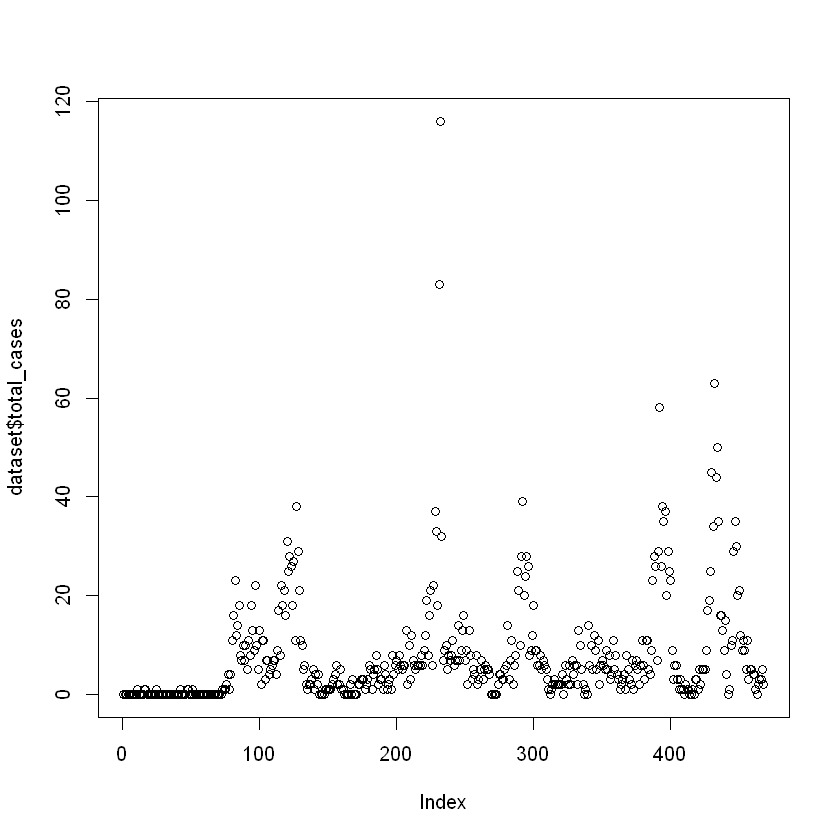

In [3]:
plot(dataset$total_cases)

In [4]:
window_size = 4
split_index = floor(0.7 * nrow(dataset))
lag_weeks = 2
train = dataset$total_cases[1:(split_index+window_size)]
test = dataset$total_cases[(split_index+window_size+lag_weeks):(nrow(dataset))]

length(train)
length(test)

[1] 331

[1] 136

In [8]:
endIndex = length(test)
trainIndex = length(train)

predictions = numeric(0)
for (index in 1:endIndex){
# for(index in 1:10) {
    fit <- auto.arima(dataset$total_cases[1:trainIndex+index-1])
    fcast <- forecast(fit, h=2)
    forecasted_data <- data.frame(fcast)
    predictions[index] <- forecasted_data$Point.Forecast[2]
}

In [9]:
length(predictions)

predictions

[1] 136

[1]  4.893515  3.841717  7.693257  7.091627  6.530025  5.041609  3.718776
  [8]  3.202754  2.191815  6.988881  4.800360  7.566564  5.582394  8.720620
 [15]  7.658283  6.936482  8.514667  5.527723  6.819508  6.500313  6.495651
 [22]  6.064490  7.340134  6.097832  7.271920  5.427176  5.775527  7.654721
 [29]  6.093120  7.371562  5.810709  5.567727  4.389167  4.437957  4.438710
 [36]  4.793729  3.853301  6.140351  5.287445  5.129130  4.519407  6.040731
 [43]  4.138734  5.895661  6.016802  5.884590  4.904496  6.011517  7.596838
 [50]  6.554883  5.837918  8.039179  8.246532  6.955585  6.453202  7.627984
 [57] 12.281307 15.193960 16.506803 11.112674 17.895958 27.851703 22.394356
 [64] 28.812887 24.594128 26.705324 19.389051 20.678792 16.940756 17.377876
 [71] 12.249619  8.650045  6.130755  4.759456  4.864268  4.560090  5.046779
 [78]  4.413605  4.656987  3.923796  4.399462  4.045499  4.337342  3.882793
 [85]  3.749906  3.782365  3.461265  4.597222  4.673815  4.776166  5.903248
 [92]  4.840130  6.370099  5.889793  6.526387  7.728263 10.730699 12.394033
 [99] 15.734223 24.593621 22.741621 41.912013 32.509927 40.663724 30.076526
[106] 20.710132 17.744117 14.255777 11.434744 12.961692  8.048640  6.107678
[113]  4.928901  8.238961  9.131472 17.487739 21.603317 21.734640 20.621262
[120] 18.122920 13.326945 11.337502  8.467383  6.954575  7.883276  9.583063
[127]  6.199018  6.315517  4.741386  4.467612  5.363871  2.405633  1.482912
[134]  4.404318  4.756040  4.908421

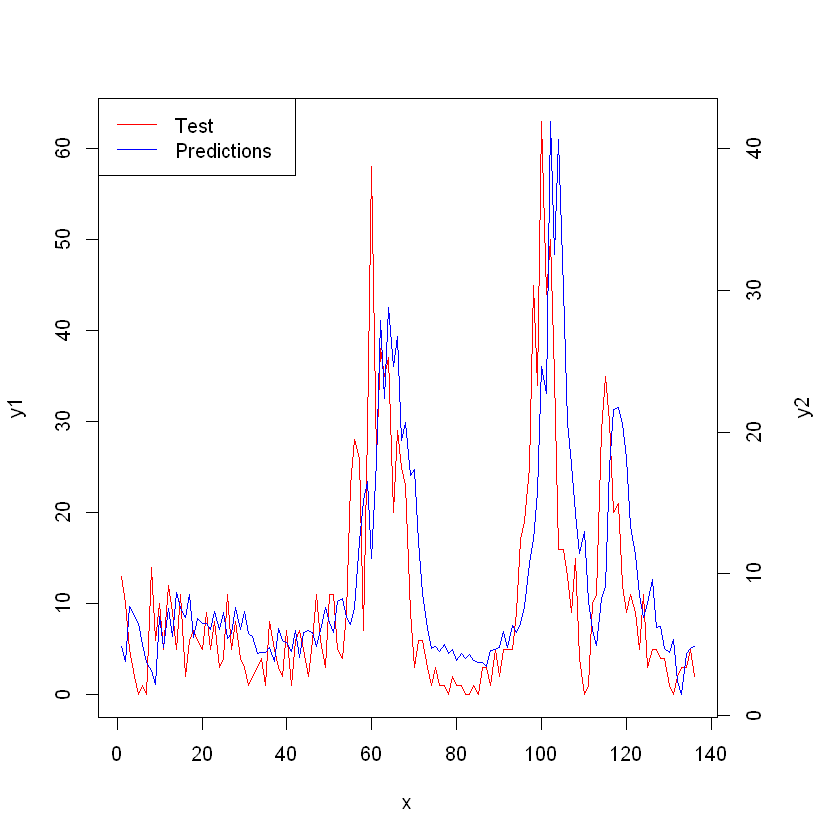

In [10]:

x <- 1:endIndex
y1 <- test
y2 <- predictions
par(mar=c(5,4,4,5)+.1)
plot(x,y1,type="l",col="red")
par(new=TRUE)
plot(x, y2,,type="l",col="blue",xaxt="n",yaxt="n",xlab="",ylab="")
axis(4)
mtext("y2",side=4,line=3)
legend("topleft",col=c("red","blue"),lty=1,legend=c("Test","Predictions"))

In [11]:
library(MLmetrics)
mse = MSE(predictions, test)
mse


Attaching package: 'MLmetrics'

The following object is masked from 'package:base':

    Recall



[1] 86.16058

In [10]:
df <- data.frame(test, predictions)